In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# generate two class dataset
data = pd.read_csv("stroke 21 variables for ML.csv")
data.head()

In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


,stroke,NP,NC,MP,MC,BasoP,BasoC,EosP,EosC,MPV,...,RBC,RDW-DV,MCV,Glc,PLT,PDW,PCT,Hgb,Sex,Age
0,1,85.40,7.95,4.7,0.44,0.2,2,1.2,0.11,10.0,...,2.71,15.0,81.5,11.91,177,16.2,0.177,73,0,64
1,1,66.60,5.10,5.4,0.41,0.2,2,0.8,0.06,8.7,...,4.98,12.7,89.4,6.93,241,16.0,0.210,153,1,47
2,1,61.70,4.72,6.6,0.51,0.2,2,4.4,0.34,8.4,...,4.62,12.5,92.0,9.43,227,15.0,0.192,139,1,44
3,1,83.34,10.69,2.9,0.37,0.2,2,0.2,0.02,9.3,...,5.06,12.4,88.5,7.98,296,11.3,0.270,138,0,60
4,1,58.50,3.93,5.3,0.36,0.3,2,0.4,0.03,8.7,...,3.70,12.8,91.0,5.67,193,15.3,0.168,107,0,65


In [15]:
# Split target and features
X = data.drop(['stroke'],axis=1)
X
y = data['stroke']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

(10476, 23)
(10476,)


In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X_features = X
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=5)

# second one

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=5)

print(X_train.shape)
print(X_test.shape)
#print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
#print(y_valid.shape)

(8380, 23)
(2096, 23)
(8380,)
(2096,)


In [18]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB



# logistic regression
model1 = LogisticRegression(C=1.01)
# knn
model2 = KNeighborsClassifier(n_neighbors=51)
# RF
model3 = RandomForestClassifier(random_state=25,criterion='entropy',n_estimators=186)

# XGBoost
model4 = XGBClassifier(learning_rate=0.01, n_estimators=1000, silent=0, gamma=0.2, subsample=0.75, 
                       objective='binary:logistic', reg_alpha=1, reg_lambda=1,seed=27,
                      max_depth=7, min_child_weight=3)

## elastic net
##model5 = ElasticNet(alpha=0.001, l1_ratio=0.1)

# neural network
model6 = MLPClassifier(alpha=0.1, hidden_layer_sizes=13)

# GaussianNB
model7=GaussianNB() ##因为唯一参数 var_smoothing设置为非默认值时， evaluation metrics的值很不理想

## 所以此处直接就是 by default 来设置

In [19]:
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
## model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
## pred_prob5 = model5.predict(X_test)
pred_prob6 = model6.predict_proba(X_test)
pred_prob7 = model7.predict_proba(X_test)

C:\Users\93513\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[10:34:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\93513\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [20]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
## pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)
pred7 = model7.predict(X_test)

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
## fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# pos_label : 整数或者字符串, 默认None，表示被认为是正类样本的类别, 可以不填，因为运行三五十个点后就可以看到ROC曲线了

In [22]:
# 1 - AUC on testing set
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
## auc_score5 = roc_auc_score(y_test, pred_prob5)
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])



print(auc_score1, auc_score2, auc_score3, auc_score4,auc_score6,auc_score7)

0.8763238913732958 0.8893549617868789 0.9011967950696742 0.9149176412310152 0.9165913149265651 0.8382136674852915


In [23]:
# 2-Accuracy on testing set

acc1 = model1.score(X_test,y_test)
acc2 = model2.score(X_test,y_test)
acc3 = model3.score(X_test,y_test)
acc4 = model4.score(X_test,y_test)
## acc5 = model5.score(X_train,y_train)
acc6 = model6.score(X_test,y_test)
acc7 = model7.score(X_test,y_test)
print(acc1,acc2,acc3,acc4,acc6,acc7)

0.7938931297709924 0.7962786259541985 0.8187022900763359 0.8272900763358778 0.8320610687022901 0.7485687022900763


In [24]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

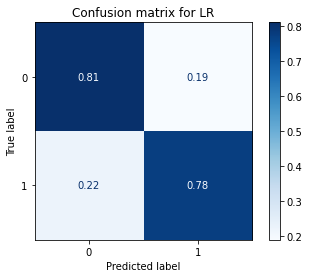

In [44]:
# 3 -confusion matrix on testing set
from sklearn.metrics import plot_confusion_matrix

matrix1 = plot_confusion_matrix(model1, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for LR')
plt.show(matrix1)
plt.show()

In [47]:
print (sum(y_test != 1))
print (sum(y_test == 1))
print (sum(pred1 != 1))
print (sum(pred1 == 1))


1059
1037
1091
1005


200 805 859 232


In [50]:
# 4-Specificity

# 没有具体的接口计算specificity，但是可以创建confusion matrix，然后通过 TP,Fn,FP,TN这些指标来计算

from sklearn.metrics import confusion_matrix

# TN = CM[0][0]
# FN = CM[1][0]
# TP = CM[1][1]
# FP = CM[0][1]

cm1 = confusion_matrix(y_test,pred1)   # 创建行是真实值，列是预测值
cm2 = confusion_matrix(y_test,pred2) 
cm3 = confusion_matrix(y_test,pred3) 
cm4 = confusion_matrix(y_test,pred4) 
# cm5 = confusion_matrix(y_test,pred5)
cm6 = confusion_matrix(y_test,pred6)
cm7 = confusion_matrix(y_test,pred7)


# sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])      #特异度 TN/(TN+FP)

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
specificity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
specificity4 = cm4[0,0]/(cm4[0,0]+cm4[0,1])
#specificity5 = cm5[0,0]/(cm5[0,0]+cm5[0,1])
specificity6 = cm6[0,0]/(cm6[0,0]+cm6[0,1])
specificity7 = cm7[0,0]/(cm7[0,0]+cm7[0,1])


# 5 - Recall / Sensitivity

recall1 = recall_score(y_test, pred1)
recall2 = recall_score(y_test, pred2)
recall3 = recall_score(y_test, pred3)
recall4 = recall_score(y_test, pred4)
## recall5 = recall_score(y_test, pred5)
recall6 = recall_score(y_test, pred6)
recall7 = recall_score(y_test,pred7)

print(recall1,recall2,recall3,recall4,recall6,recall7)

print(specificity1,specificity2,specificity3,specificity4,specificity6,specificity7)

0.7762777242044359 0.6972034715525555 0.8061716489874639 0.8254580520732884 0.8216007714561234 0.6509161041465766
0.8111425873465533 0.8932955618508026 0.8309726156751652 0.8290840415486308 0.842304060434372 0.8441926345609065


In [ ]:
## Calculator for 95% CI - Sensitivity/Recall and Specificity

## http://vassarstats.net/clin1.html          Calculator
## https://baijiahao.baidu.com/s?id=1618431556279914692&wfr=spider&for=pc     Explanation

In [51]:
from sklearn.metrics import confusion_matrix

CM1 = confusion_matrix(y_test,pred1)

TN1 = CM1[0][0]
FN1 = CM1[1][0]
TP1 = CM1[1][1]
FP1 = CM1[0][1]

print(FP1, TP1, TN1, FN1)

200 805 859 232


In [52]:
CM2 = confusion_matrix(y_test,pred2)

TN2 = CM2[0][0]
FN2 = CM2[1][0]
TP2 = CM2[1][1]
FP2 = CM2[0][1]

print(FP2, TP2, TN2, FN2)

113 723 946 314


In [53]:
CM3 = confusion_matrix(y_test,pred3)

TN3 = CM3[0][0]
FN3 = CM3[1][0]
TP3 = CM3[1][1]
FP3 = CM3[0][1]

print(FP3, TP3, TN3, FN3)

179 836 880 201


In [54]:
CM4 = confusion_matrix(y_test,pred4)

TN4 = CM4[0][0]
FN4 = CM4[1][0]
TP4 = CM4[1][1]
FP4 = CM4[0][1]

print(FP4, TP4, TN4, FN4)

181 856 878 181


In [56]:
CM6 = confusion_matrix(y_test,pred6)

TN6 = CM6[0][0]
FN6 = CM6[1][0]
TP6 = CM6[1][1]
FP6 = CM6[0][1]

print(FP6, TP6, TN6, FN6)

167 852 892 185


In [55]:
CM7 = confusion_matrix(y_test,pred7)

TN7 = CM7[0][0]
FN7 = CM7[1][0]
TP7 = CM7[1][1]
FP7 = CM7[0][1]

print(FP7, TP7, TN7, FN7)

165 675 894 362


In [27]:
import math

def binconf(p, n, c=0.95):
    '''
    Calculate binomial confidence interval based on the number of positive and
    negative events observed.  Uses Wilson score and approximations to inverse
    of normal cumulative density function.

    Parameters
    ----------
    p: int
      number of positive events observed
    n: int
      number of negative events observed
    c : optional, [0,1]
      confidence percentage. e.g. 0.95 means 95% confident the probability of
      success lies between the 2 returned values

    Returns
    -------
    theta_low  : float
      lower bound on confidence interval
    theta_high : float
      upper bound on confidence interval
    '''
    p, n = float(p), float(n)
    N    = p + n

    if N == 0.0: return (0.0, 1.0)

    p = p / N
    z = normcdfi(1 - 0.5 * (1-c))

    a1 = 1.0 / (1.0 + z * z / N)
    a2 = p + z * z / (2 * N)
    a3 = z * math.sqrt(p * (1-p) / N + z * z / (4 * N * N))

    return (a1 * (a2 - a3), a1 * (a2 + a3))


def erfi(x):
    """Approximation to inverse error function"""
    a  = 0.147  # MAGIC!!!
    a1 = math.log(1 - x * x)
    a2 = (
    2.0 / (math.pi * a)
    + a1 / 2.0
    )

    return (
    sign(x) *
    math.sqrt( math.sqrt(a2 * a2 - a1 / a) - a2 )
    )


def sign(x):
    if x  < 0: return -1
    if x == 0: return  0
    if x  > 0: return  1


def normcdfi(p, mu=0.0, sigma2=1.0):
    """Inverse CDF of normal distribution"""
    if mu == 0.0 and sigma2 == 1.0:
        return math.sqrt(2) * erfi(2 * p - 1)
    else:
        return mu + math.sqrt(sigma2) * normcdfi(p)

In [30]:

import pickle
with open('model_output_v3.pkl', 'wb') as f:
    pickle.dump(output, f)

In [32]:
import pickle

In [35]:

with open('model_output_v3.pkl', 'rb') as f:
    output = pickle.load(f)

In [36]:

def get_optimal_operating_point(y_true, y_pred):
    thresholds = []
    sens_plus_spec = []
    for threshold in np.arange(0, 1, .01):
        preds = [1 if p > threshold else 0 for p in y_pred]
        tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
        specificity = tn / (tn + fp)
        sensitivity = tp / (tp + fn)
        thresholds.append(threshold)
        sens_plus_spec.append(sensitivity + specificity)
    max_idx = np.argmax(sens_plus_spec)
    return thresholds[max_idx]

In [37]:
def get_high_sensitivity_operating_point(y_true, y_pred, target=.9):
    thresholds = []
    sensitivities = []
    for threshold in np.arange(0, 1, .01):
        preds = [1 if p > threshold else 0 for p in y_pred]
        tn, fp, fn ,tp = confusion_matrix(y_true, preds).ravel()
        sensitivity = tp / (tp + fn)
        thresholds.append(threshold)
        sensitivities.append(sensitivity)
        
    for idx, s in enumerate(sensitivities):
        if s <= target:
            return thresholds[idx-1]

In [43]:

y_fold_preds = model3.y_pred
y_validations = model3.y_test  
    
optimal_thresholds = []
high_sens_thresholds = []

for y_pred, y_val in zip(y_fold_preds, y_validations):
    optimal_thresholds.append(get_optimal_operating_point(y_val, y_pred))
    high_sens_thresholds.append(get_high_sensitivity_operating_point(y_val, y_pred))
    
    
    print(model3)
    print("High Sensitivity Thresholds:")
    print(high_sens_thresholds)
    print("Optimal Thresholds:")
    print(optimal_thresholds)
    print()
    
    output[model_name]['high_sensitivity_threshold'] = np.mean(high_sens_thresholds)
    output[model_name]['optimal_thresholds'] = np.mean(optimal_thresholds)

AttributeError: 'RandomForestClassifier' object has no attribute 'y_pred'